The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
5.187483310699463
[589500.0, 231300.25, 722.505]
r
load
load
load
load
load
load
load
load
load
points in profile: 2990


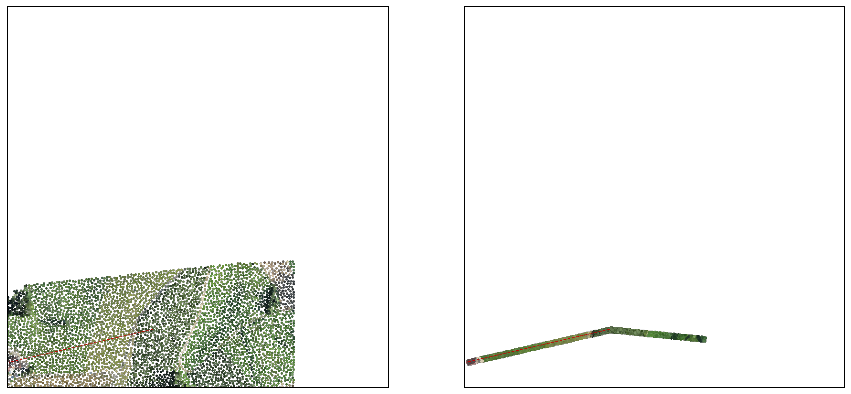

In [155]:
import json
import os
import math
from math import inf
from collections import deque
import sys
import struct
import numpy as np
from matplotlib.pyplot import imshow
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw
import time
%matplotlib inline

#plt.gca().invert_yaxis()

#
# TODOs
#
# - make thread safe!!!!!!!
# - read point attributes from cloud.js. Currently static assuming position and color
# - after loading is done, add profile extracting functionality on top
#


from POctree import *

%load_ext autoreload
%autoreload 2


# wrapping this in a function might come in handy later 
# in order to dispatch to loaders for different versions	
def loadPotreeFile(path):	
    octree = POctree(path)
    return octree

def worldToImage(coord):
    coord = coord - octree.boundingBox.min
    coord.x = int(coord.x)
    coord.y = int(imgHeight - coord.y)
    coord.z = int(coord.z)
    return coord

def renderPoints(points):

    im = Image.new('RGBA', (imgWidth, imgHeight), (0, 0, 0, 0)) 
    draw = ImageDraw.Draw(im) 
    pixelSize = 4

    for point in points:
        ipos = worldToImage(point.position)
        draw.ellipse((ipos.x, ipos.y, ipos.x + pixelSize, ipos.y + pixelSize), fill=(point.color[0], point.color[1], point.color[2]))

    localPolyline = [worldToImage(x) for x in polyline]
    draw.line((localPolyline[0].x, localPolyline[0].y, localPolyline[1].x, localPolyline[1].y), fill=(200, 0, 0), width=2)
    #im.show()
    #plt.axis('off')
    plt.gca().axes.get_xaxis().set_ticks([])
    plt.gca().axes.get_yaxis().set_ticks([])
    imshow(np.asarray(im))
    
    
octree = loadPotreeFile('D:/dev/pointclouds/converted/vol_total/cloud.js')
#octree.root.load()

p1 = Vec3(589505.87, 231353.17, 0)
p2 = Vec3(589805.59, 231421.82, 0)
p3 = Vec3(590005.59, 231401.82, 0)
polyline = [p1, p2, p3]

profile = Profile(polyline, width = 10)

bbSize = octree.boundingBox.size()
aspect = bbSize.x / bbSize.y
imgWidth = int(800 if (aspect > 1) else (aspect * 800))
imgHeight = int(800 if (aspect <= 1) else (aspect * 800))

print(octree.spacing)
print(octree.boundingBox.min)
print(octree.root.name())

points = octree.getPointsInProfile(profile, maxLOD = 2, pointCountTarget = 20000)
print("points in profile: " + str(len(points)))

fig = plt.figure(figsize = (15,15))
plt.subplot(2,2,1)
renderPoints(octree.root.points)

#fig = plt.figure(figsize = (5,5))
plt.subplot(2,2,2)
renderPoints(points)

In [154]:

start = time.time()

points = octree.getPointsInProfile(profile, maxLOD = 2, pointCountTarget = 20000)

end = time.time()
duration = (end - start)
print("points in profile: " + str(len(points)))
print("duration: " + str(duration))


points in profile: 2990
duration: 0.8020458221435547


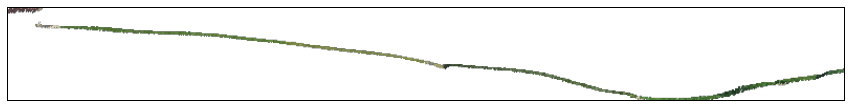

In [148]:
def renderProfile(points, imgWidth):
    
    bb = BoundingBox()
    for point in points:
        bb.min = bb.min.min(point.position)
        bb.max = bb.max.max(point.position)
        
    bbSize = bb.size()
    aspect = bbSize.x / bbSize.z
    imgHeight = int(imgWidth / aspect)
    imgFactor = imgWidth / bbSize.x
    
    im = Image.new('RGBA', (imgWidth, imgHeight), (0, 0, 0, 0)) 
    draw = ImageDraw.Draw(im) 
    pixelSize = 1

    for point in points:
        ipos = (point.position - bb.min) * imgFactor
        ipos.z = imgHeight - ipos.z
        #ipos = worldToImage(point.position)
        #print(ipos)
        draw.ellipse((ipos.x, ipos.z, ipos.x + pixelSize, ipos.z + pixelSize), fill=(point.color[0], point.color[1], point.color[2]))

    plt.gca().axes.get_xaxis().set_ticks([])
    plt.gca().axes.get_yaxis().set_ticks([])
    imshow(np.asarray(im))
    
fig = plt.figure(figsize = (15, 15))
plt.subplot(1,1,1)
renderProfile(points, 800)